In [ ]:
fruits = ['apple', 'banana', 'cherry']
fruits = []
fruits.append("orange")

In [ ]:
import random as rand

print("Ugyanaz:")
letezikek = []
iterations = 100000
for it in range(iterations):  
  birthdays = []
  for i in range(100):
    random_birthday = rand.randrange(366)
    birthdays.append(random_birthday)
  letezik = False
  for i in range(len(birthdays)):
    for j in range(len(birthdays)):
      if i != j and birthdays[i] == birthdays[j]:
        #print(bd)
        letezik = True
        letezikek.append(letezik)
        break
    if letezik:
      break


print len(letezikek)





Ugyanaz:
100000


Ugyanaz:
0
272
1144
2581
4196
5539
6999
8057
8909
9410
9692
9854
9957
9980
9993
9998
9999
10000
10000
10000


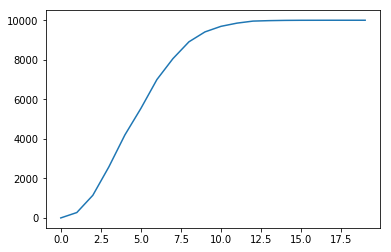

In [ ]:
import random as rand
import matplotlib.pyplot as plt

print("Ugyanaz:")

end = 100
rit = 20

letezikekek = []
for r in range(rit):
  letezikek = []
  iterations = 10000
  for it in range(iterations):  
    birthdays = []
    for i in range(r*end/rit):
      random_birthday = rand.randrange(366)
      birthdays.append(random_birthday)
    letezik = False
    for i in range(len(birthdays)):
      for j in range(len(birthdays)):
        if i != j and birthdays[i] == birthdays[j]:
          #print(bd)
          letezik = True
          letezikek.append(letezik)
          break
      if letezik:
        break
  letezikekek.append(len(letezikek))
  print len(letezikek)

plt.plot(range(0, 100, 5), letezikekek)





#Machine learning:

In [ ]:
import tensorflow as tf

In [ ]:

#!mkdir asd
!cd asd
! pwd


/content


In [ ]:
!pwd
%cd asd
!pwd

/content/asd
[Errno 2] No such file or directory: 'asd'
/content/asd
/content/asd


#Add two numbers with tensorflow

In [ ]:
import tensorflow as tf

##Constant

In [ ]:
num1 = tf.constant([2])
num2 = tf.constant([11])

result = tf.add(num1,num2)
re = result
result = 2

with tf.Session() as sess1:
  with tf.device("/gpu:1"):
    r, num =sess1.run([re, num1])
    print(r)
    print(num1)
  



[13]
Tensor("Const_10:0", shape=(1,), dtype=int32)


##Placeholder

In [ ]:
num1=tf.placeholder(tf.int32, [1])
num2=tf.placeholder(tf.int32, [1])

result = tf.add(num1, num2)


with tf.Session() as sess:
  with tf.device("/gpu:1"):
    r = sess.run([result], feed_dict={num1: [2], num2: [3]})
    print(r)

[array([5], dtype=int32)]


In [ ]:


num1= tf.placeholder(tf.int32, [1])
num2 = tf.placeholder(tf.int32, [1])

result = tf.add(num1, num2)


r = tf.Session().run([result], feed_dict={num1: [2], num2: [3]})
print(r)

[array([5], dtype=int32)]


##Variable training

In [ ]:
num1 = tf.placeholder(tf.float32)
num2 = tf.Variable([2.0], name="variable_to_optimize", trainable = True)
 
expected_output = tf.placeholder(tf.float32)
result = tf.add(num1, num2)

with tf.name_scope("loss"):
  dif = tf.subtract(result, expected_output)
  loss = tf.square(dif)
  

learning_rate = 0.1
with tf.name_scope("optimizer"):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
init = tf.global_variables_initializer()

with tf.Session() as sess:
  with tf.device("/gpu:1"):
    sess.run(init)
    
    for i in range(10):
      _, n2, r, l = sess.run([optimizer, num2, result, loss], feed_dict={num1: [2], expected_output: [6]})
      print("num2: " + str(n2) + " result: "+ str(r) + " loss: " + str(l))
  

num2: [2.] result: [4.] loss: [0.0720576]
num2: [2.4] result: [4.4] loss: [0.0720576]
num2: [2.72] result: [4.7200003] loss: [0.0720576]
num2: [2.976] result: [4.976] loss: [0.0720576]
num2: [3.1808002] result: [5.1808004] loss: [0.0720576]
num2: [3.34464] result: [5.34464] loss: [0.0720576]
num2: [3.475712] result: [5.475712] loss: [0.0720576]
num2: [3.5805697] result: [5.5805697] loss: [0.0720576]
num2: [3.664456] result: [5.664456] loss: [0.0720576]
num2: [3.7315648] result: [5.7315645] loss: [0.0720576]


#Gyakorlás

In [ ]:
import tensorflow as tf

In [ ]:
a = tf.constant(1.0)
b = tf.constant(2.0)
c = a + b

sess1 = tf.Session()
print(sess1.run(c))

with tf.Session() as sess2:
  print(sess2.run(c))

3.0
3.0


In [ ]:
a = tf.placeholder(tf.float32)
b = tf.Variable(2.0)
desired = tf.placeholder(tf.float32)

#computational graph
result = a + b 

#loss
loss = tf.square(tf.subtract(result, desired))
#opt
opt = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for i in range(9):
    o, l, r, b_ = sess.run([opt, loss, result, b], feed_dict = {a: 1, desired: 11})
    print(str(i) + '  l: ' + str(l) + '  r: ' + str(r) + '  b_: ' + str(b_))

0  l: 64.0  r: 3.0  b_: 2.0
1  l: 61.465603  r: 3.16  b_: 2.16
2  l: 59.03156  r: 3.3168  b_: 2.3168
3  l: 56.69391  r: 3.4704642  b_: 2.4704642
4  l: 54.448833  r: 3.621055  b_: 2.621055
5  l: 52.292656  r: 3.7686338  b_: 2.7686338
6  l: 50.221863  r: 3.9132612  b_: 2.9132612
7  l: 48.23308  r: 4.054996  b_: 3.054996
8  l: 46.323048  r: 4.1938963  b_: 3.193896


#Fully Connected

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data 

In [ ]:
#read data and display data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # we will use one hot encoding, every outputclass is a separate dimension

In [ ]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape) # we have train images and train labels
print(mnist.test.images.shape)
print(mnist.test.labels.shape) # ans separate test iamges and labels for evaluation
#print(mnist.train.images[0,:])
mnist.train.labels[0]

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

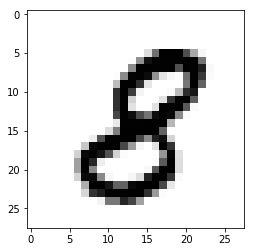

In [ ]:
#display an image just to get a feel what we are working on
import matplotlib.pyplot as plt
img= np.reshape(mnist.train.images[5,:],[28,28])

plt.imshow(img,cmap="Greys")
plt.show()

In [ ]:
print mnist.train.labels[5]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


##Próbálás


In [ ]:
#variable_scope
with tf.compat.v1.variable_scope("foo"):
    with tf.compat.v1.variable_scope("bar"):
        v = tf.compat.v1.get_variable("v", [1])
        assert v.name == "foo/bar/v:0"

import tensorflow as tf
tf.reset_default_graph()
a2 = tf.Variable(tf.random_uniform([2, 3, 4], minval=0, maxval=10, dtype=tf.int32))
b2 = tf.Variable(tf.random_uniform([2, 3, 4], minval=0, maxval=10, dtype=tf.int32))
c2 = tf.add(a2,b2)
a = tf.Variable([1,2,3] )
a1 = tf.get_variable('a1', [1,2,3])
b = tf.Variable([[1,2,3],[4,5,6]] )
c = tf.add(a,b)
print a

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print '--------------------------------'
print sess.run(a2)
print sess.run(b2)
print '________________________'
print sess.run(c2)

NameError: ignored

##Graph


In [ ]:
#corss entropy measures similarity between two distributions. If cross entropy is zero, the two distributions are the same
with tf.name_scope('loss'):
	    Loss = tf.reduce_mean( tf.losses.softmax_cross_entropy(OneHotLabels,FC)  ) # reduce_mean???

with tf.name_scope('optimizer'):    
	    #Use ADAM optimizer this is currently the best performing training algorithm in most cases
	    Optimizer = tf.train.AdamOptimizer(1e-4).minimize(Loss)
        #Optimizer = tf.train.GradientDescentOptimizer(LearningRate).minimize(Loss)

In [ ]:
tf.reset_default_graph() #reset the graph
InputData = tf.placeholder(tf.float32, [1,784] )  #input images
OneHotLabels = tf.placeholder(tf.int32, [1,10]) #the expected outputs, labels


NumLayers= [784,128,64,10]

CurrentInput=InputData
for i in range(len(NumLayers)-1):
  with tf.variable_scope('layers'+str(i)):
    
    #súlyok egy 
    W =tf.get_variable('W', [NumLayers[i],NumLayers[i+1]])# w[784,128]
    Layer=tf.matmul(CurrentInput,W) # matmul - matrix multiplication: inp[1,784]*w[784,128] = Layer[1,128] -----------------------------------------------------------
    b =tf.get_variable('b', [1,NumLayers[i+1]])
    Layer=tf.add(Layer,b)
    Layer=tf.nn.relu(Layer)
    
    CurrentInput=Layer
    print CurrentInput
FC=CurrentInput

Tensor("layers0/Relu:0", shape=(1, 128), dtype=float32)
Tensor("layers1/Relu:0", shape=(1, 64), dtype=float32)
Tensor("layers2/Relu:0", shape=(1, 10), dtype=float32)


In [ ]:
Init = tf.global_variables_initializer()
with tf.Session() as Sess:
	Sess.run(Init)
	
	Step = 1
	# Keep training until reach max iterations - other stopping criterion could be added
	while Step < 10000:
		UsedInBatch= random.sample( range(mnist.train.images.shape[0]), 1)
		batch_xs = mnist.train.images[UsedInBatch,:]
		batch_ys = mnist.train.labels[UsedInBatch,:]
		_,L = Sess.run([Optimizer, Loss], feed_dict={InputData: batch_xs, OneHotLabels: batch_ys})
   #Kiiras
		if (Step%100)==0:
		  print("Iteration: "+str(Step))
		  print("Loss:" + str(L))
		Step+=1

#Convolutional

##Read and display

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data 

In [ ]:
#read data and display data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # we will use one hot encoding, every outputclass is a separate dimension

In [ ]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape) # we have train images and train labels
print(mnist.test.images.shape)
print(mnist.test.labels.shape) # ans separate test iamges and labels for evaluation
#print(mnist.train.images[0,:])
mnist.train.labels[0]

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

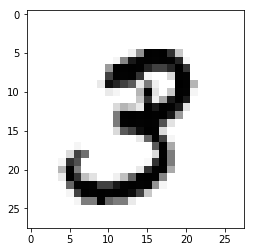

In [ ]:
#display an image just to get a feel what we are working on
import matplotlib.pyplot as plt
img= np.reshape(mnist.train.images[1,:],[28,28])

plt.imshow(img,cmap="Greys")
plt.show()

##Parameters

In [ ]:
#the parameters of the algorithm
BatchLength_train= 32  #batches of 32 images are processed and averaged out
BatchLength_test = 32

NumIteration= 10000 #--------------------------15000 esetén kb 2 perc futás
Runnings = 10

Size=[28,28,1]  #size of the input image
LearningRate=1e-4 #initial learning rate
NumClasses = 10 #number of possible output classes
EvalFreq = NumIteration # we will evaluate at every 1000 step

##Building up the graph

ReLU, NEM batchnorm:

In [ ]:
tf.reset_default_graph() #reset the graph
InputData = tf.placeholder(tf.float32, [None]+Size )  #input images
OneHotLabels = tf.placeholder(tf.int32, [None, NumClasses]) #the expected outputs, labels
KeepProb = tf.placeholder(tf.float32 )  #input image
print(InputData)
NumKernels=[32,64,128] #a list that defined the number of layers and how many convolution kernels we have at each layer

def CNNReLU(x):
  x=tf.maximum(-1.0,x)
  x=tf.minimum(1.0,x)
  return x

def LeakyReLU(x):
  x = tf.maximum(x, -1.0+0.01*(x+1.0))
  x = tf.minimum(x, 1.0-0.01*(x-1.0))
  return x

CurrentInput=InputData
CurrentFilters=Size[2]
LayerNum=0
# a loop which creates all layers
for N in NumKernels:
    with tf.variable_scope('conv'+str(LayerNum)):
      LayerNum+=1
      #variables that we want to optimize
      W =tf.get_variable('W', [3,3,CurrentFilters,N])
      Bias = tf.get_variable('Bias', [N],initializer=tf.constant_initializer(0.0))
      #convolution
      ConvResult = tf.nn.conv2d(CurrentInput,W,strides=[1,1,1,1], padding='SAME')#.------
      CurrentFilters=N
      #we add a bias
      ConvResult = tf.add(ConvResult,Bias)
      #-----------------------------------------------------------------------batchnorm------------------------------------------------------------
      '''
      beta = tf.get_variable('beta',[N],initializer=tf.constant_initializer(0.0)) # itt NumKernel az adott rétegben taláhlató feature-ök/castornák száma
      gamma = tf.get_variable('gamma',[N],initializer=tf.constant_initializer(1.0)) #itt is hasonló az előzőhöz
      Mean,Variance = tf.nn.moments(ConvResult,[0,1,2]) #ConvResult az adat, amit normalizálni szeretnénk (ezt általában a convolució után szokták tenni, s így nicns szükség külön bias-ra)
      ConvResult = tf.nn.batch_normalization(ConvResult,Mean,Variance,beta,gamma,1e-10)
      print(ConvResult)
      '''
      # relu----------------------------------------------------------------------------------------------ReLU------------------------------
      ReLU=tf.nn.relu(ConvResult)
      #ReLU=CNNReLU(ConvResult)
      #ReLU=LeakyReLU(ConvResult)
      #pool
      Pooled=tf.nn.max_pool(ReLU,ksize=[1,3,3,1],strides=[1,1,1,1],padding='SAME') #[1,3,3,1], [1,1,1,1] így cnn kompatibilis----------------------------
      CurrentInput=Pooled
      print(Pooled)
    #we have generated feature maps, we will use a fully connected layer with ten neurons, one for each class
    #the response of these neruons will represent how "strongly" the element belong to this class
with tf.variable_scope('FC'):
	    CurrentShape=CurrentInput.get_shape()
	    FeatureLength = int(CurrentShape[1]*CurrentShape[2]*CurrentShape[3])
	    FC = tf.reshape(CurrentInput, [-1, FeatureLength])
	    FC = tf.nn.dropout(FC,KeepProb)
	    W = tf.get_variable('W',[FeatureLength,NumClasses])
	    FC = tf.matmul(FC, W)
	    Bias = tf.get_variable('Bias',[NumClasses])
	    FC = tf.add(FC, Bias)
print(FC)
print(ReLU)

W0620 19:45:40.677444 140445284788096 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0620 19:45:40.738684 140445284788096 deprecation.py:506] From <ipython-input-7-c9a327ab4e74>:55: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv0/MaxPool:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("conv1/MaxPool:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv2/MaxPool:0", shape=(?, 28, 28, 128), dtype=float32)
Tensor("FC/Add:0", shape=(?, 10), dtype=float32)
Tensor("conv2/Relu:0", shape=(?, 28, 28, 128), dtype=float32)


CNNReLU, Batchnorm

In [ ]:
tf.reset_default_graph() #reset the graph
InputData = tf.placeholder(tf.float32, [None]+Size )  #input images
OneHotLabels = tf.placeholder(tf.int32, [None, NumClasses]) #the expected outputs, labels
KeepProb = tf.placeholder(tf.float32 )  #input image
print(InputData)
NumKernels=[32,64,128] #a list that defined the number of layers and how many convolution kernels we have at each layer

def CNNReLU(x):
  x=tf.maximum(-1.0,x)
  x=tf.minimum(1.0,x)
  return x

def LeakyReLU(x):
  x = tf.maximum(x, -1.0+0.01*(x+1.0))
  x = tf.minimum(x, 1.0-0.01*(x-1.0))
  return x

CurrentInput=InputData
CurrentFilters=Size[2]
LayerNum=0
# a loop which creates all layers
for N in NumKernels:
    with tf.variable_scope('conv'+str(LayerNum)):
      LayerNum+=1
      #variables that we want to optimize
      W =tf.get_variable('W', [3,3,CurrentFilters,N])
      Bias = tf.get_variable('Bias', [N],initializer=tf.constant_initializer(0.0))
      #convolution
      ConvResult = tf.nn.conv2d(CurrentInput,W,strides=[1,1,1,1], padding='SAME')#--------VALID-->SAME
      CurrentFilters=N
      #we adda bias
      ##ConvResult = tf.add(ConvResult,Bias)
      #-----------------------------------------------------------------------batchnorm------------------------------------------------------------
      
      beta = tf.get_variable('beta',[N],initializer=tf.constant_initializer(0.0)) # itt NumKernel az adott rétegben taláhlató feature-ök/castornák száma
      gamma = tf.get_variable('gamma',[N],initializer=tf.constant_initializer(1.0)) #itt is hasonló az előzőhöz
      Mean,Variance = tf.nn.moments(ConvResult,[0,1,2]) #ConvResult az adat, amit normalizálni szeretnénk (ezt általában a convolució után szokták tenni, s így nicns szükség külön bias-ra)
      ConvResult = tf.nn.batch_normalization(ConvResult,Mean,Variance,beta,gamma,1e-10)
      print(ConvResult)
      
      # relu----------------------------------------------------------------------------------------------ReLU------------------------------
      #ReLU=tf.nn.relu(ConvResult)
      ReLU=CNNReLU(ConvResult)
      #ReLU=LeakyReLU(ConvResult)
      #pool
      Pooled=tf.nn.max_pool(ReLU,ksize=[1,3,3,1],strides=[1,1,1,1],padding='SAME') #[1,2,2,1],strides=[1,2,2,1] VALID így cnn kompatibilis----------------------------
      CurrentInput=Pooled
      print(Pooled)
    #we have generated feature maps, we will use a fully connected layer with ten neurons, one for each class
    #the response of these neruons will represent how "strongly" the element belong to this class
with tf.variable_scope('FC'):
	    CurrentShape=CurrentInput.get_shape()
	    FeatureLength = int(CurrentShape[1]*CurrentShape[2]*CurrentShape[3])
	    FC = tf.reshape(CurrentInput, [-1, FeatureLength])
	    FC = tf.nn.dropout(FC,KeepProb)
	    W = tf.get_variable('W',[FeatureLength,NumClasses])
	    FC = tf.matmul(FC, W)
	    Bias = tf.get_variable('Bias',[NumClasses])
	    FC = tf.add(FC, Bias)
print(FC)
print(ReLU)

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv0/batchnorm/add_1:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("conv0/MaxPool:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("conv1/batchnorm/add_1:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/MaxPool:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv2/batchnorm/add_1:0", shape=(?, 28, 28, 128), dtype=float32)
Tensor("conv2/MaxPool:0", shape=(?, 28, 28, 128), dtype=float32)
Tensor("FC/Add:0", shape=(?, 10), dtype=float32)
Tensor("conv2/Minimum:0", shape=(?, 28, 28, 128), dtype=float32)


Loss, Optimizer, Accuracy

In [ ]:
#we use softmax to normalize the outputs of the network 
#sotfmax comes from the logistic regression and is e^i / sum(e^j) for all i and j
#this will normlaize all the values between zero and one and the sum of values will be 1

#corss entropy measures similarity between two distributions. If cross entropy is zero, the two distributions are the same
with tf.name_scope('loss'):
	    Loss = tf.reduce_mean( tf.losses.softmax_cross_entropy(OneHotLabels,FC)  )

with tf.name_scope('optimizer'):    
	    #Use ADAM optimizer this is currently the best performing training algorithm in most cases
	    Optimizer = tf.train.AdamOptimizer(LearningRate).minimize(Loss)
        #Optimizer = tf.train.GradientDescentOptimizer(LearningRate).minimize(Loss)

with tf.name_scope('accuracy'):	  
	    CorrectPredictions = tf.equal(tf.argmax(FC, 1), tf.argmax(OneHotLabels, 1))
	    Accuracy = tf.reduce_mean(tf.cast(CorrectPredictions, tf.float32))
	      

##Running

In [ ]:
accuracies=[]
for n in range(Runnings):
  print("--"+str(n)+"--------------------------------")
  
  Init = tf.global_variables_initializer()

  train_images = random.sample(range(mnist.train.images.shape[0]), 50)

  with tf.Session() as Sess:
    Sess.run(Init)

    Step = 1
    # Keep training until reach max iterations - other stopping criterion could be added
    while Step <= NumIteration:
      #UsedInBatch= random.sample( range(mnist.train.images.shape[0]), BatchLength) #bl db random szám generálása 1->55000-ig 
      UsedInBatch= random.sample( train_images, BatchLength_train)
      batch_xs = mnist.train.images[UsedInBatch,:]
      batch_ys = mnist.train.labels[UsedInBatch,:]
      batch_xs=np.reshape(batch_xs,[BatchLength_train]+Size)
      _,Acc,L = Sess.run([Optimizer, Accuracy, Loss], feed_dict={InputData: batch_xs, OneHotLabels: batch_ys,KeepProb:0.8})
      if (Step%(NumIteration/10))==0: #-------------------------------------------------
        print("Iteration: "+str(Step))
        print("Accuracy:" + str(Acc))
        print("Loss:" + str(L))

      '''
      #independent test accuracy
      if (Step%EvalFreq)==0:
        SumAcc=0.0
        for i in range(0,mnist.test.images.shape[0]):
          batch_xs = mnist.test.images[i,:]
          batch_ys = mnist.test.labels[i,:]
          batch_xs=np.reshape(batch_xs,[1]+Size)
          batch_ys=np.reshape(batch_ys,[1,NumClasses])
          a = Sess.run(Accuracy, feed_dict={InputData: batch_xs, OneHotLabels: batch_ys,KeepProb:1.0})
          SumAcc+=a  
        print("Independent Test set: "+str(float(SumAcc)/mnist.test.images.shape[0]))
      Step+=1
      '''
      
      #independent test accuracy
      if (Step%EvalFreq)==0:
        SumAcc=0.0
        for i in range(0, mnist.test.images.shape[0]-BatchLength_test, BatchLength_test):
          batch_xs = mnist.test.images[i:i+BatchLength_test,:]
          batch_ys = mnist.test.labels[i:i+BatchLength_test,:]
          batch_xs = np.reshape(batch_xs,[BatchLength_test]+Size)
          batch_ys = np.reshape(batch_ys,[BatchLength_test,NumClasses])
          a = Sess.run(Accuracy, feed_dict={InputData: batch_xs, OneHotLabels: batch_ys, KeepProb:1.0})
          SumAcc+=a
        accuracies.extend([float(SumAcc)/mnist.test.images.shape[0]*BatchLength_test])
        print(str(float(SumAcc)/mnist.test.images.shape[0]*BatchLength_test))
      Step+=1
      #'''

In [ ]:
for i in range(0, len(accuracies)):
  print accuracies[i]


0.6191
0.7388
0.6353
0.6524
0.7071


In [ ]:
accuracies=[]
for n in range(Runnings):
  print("--"+str(n)+"--------------------------------")
  
  Init = tf.global_variables_initializer()

  train_images = random.sample(range(mnist.train.images.shape[0]), 50)

  with tf.Session() as Sess:
    Sess.run(Init)

    Step = 1
    # Keep training until reach max iterations - other stopping criterion could be added
    while Step <= NumIteration:
      #UsedInBatch= random.sample( range(mnist.train.images.shape[0]), BatchLength) #bl db random szám generálása 1->55000-ig 
      UsedInBatch= random.sample( train_images, BatchLength_train)
      batch_xs = mnist.train.images[UsedInBatch,:]
      batch_ys = mnist.train.labels[UsedInBatch,:]
      batch_xs=np.reshape(batch_xs,[BatchLength_train]+Size)
      _,Acc,L = Sess.run([Optimizer, Accuracy, Loss], feed_dict={InputData: batch_xs, OneHotLabels: batch_ys,KeepProb:0.8})
      if (Step%(NumIteration/10))==0: #-------------------------------------------------
        print("Iteration: "+str(Step))
        print("Accuracy:" + str(Acc))
        print("Loss:" + str(L))

      '''
      #independent test accuracy
      if (Step%EvalFreq)==0:
        SumAcc=0.0
        for i in range(0,mnist.test.images.shape[0]):
          batch_xs = mnist.test.images[i,:]
          batch_ys = mnist.test.labels[i,:]
          batch_xs=np.reshape(batch_xs,[1]+Size)
          batch_ys=np.reshape(batch_ys,[1,NumClasses])
          a = Sess.run(Accuracy, feed_dict={InputData: batch_xs, OneHotLabels: batch_ys,KeepProb:1.0})
          SumAcc+=a  
        print("Independent Test set: "+str(float(SumAcc)/mnist.test.images.shape[0]))
      Step+=1
      '''
      
      #independent test accuracy
      if (Step%EvalFreq)==0:
        SumAcc=0.0
        for i in range(0, mnist.test.images.shape[0]-BatchLength_test, BatchLength_test):
          batch_xs = mnist.test.images[i:i+BatchLength_test,:]
          batch_ys = mnist.test.labels[i:i+BatchLength_test,:]
          batch_xs = np.reshape(batch_xs,[BatchLength_test]+Size)
          batch_ys = np.reshape(batch_ys,[BatchLength_test,NumClasses])
          a = Sess.run(Accuracy, feed_dict={InputData: batch_xs, OneHotLabels: batch_ys, KeepProb:1.0})
          SumAcc+=a
        accuracies.extend([float(SumAcc)/mnist.test.images.shape[0]*BatchLength_test])
        print(str(float(SumAcc)/mnist.test.images.shape[0]*BatchLength_test))
      Step+=1
      #'''

#Hasznosságok

##tf.Variable() vs tf.get_variable()
tf.Variable(init_value, name= optional)

tf.get_variable() (initializer)

In [ ]:
tf.reset_default_graph()

a0 =tf.Variable([[2,2,2],[2,2,2]]) # inicializálás az alap paraméter, name = optional
a = tf.get_variable('a1', [2,3])#, initializer = tf.constant_initializer(3.0)) #--ha nincs initializer akkor a default init. random valuekkal tölti fel a  variable-t
                                #  initializer = tf.random_initializer( vannak paraméterei)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#a_val = sess.run(a.initializer)
a_val = sess.run(a)
print a_val


NameError: ignored

##Get variable by name
v1 = sess.graph.get_tensor_by_name("foo/v:0")

In [ ]:
#--GET VALUE OF VARIABLE from var_scope by NAME

  # 1.) reuse varscope
with tf.variable_scope('foo'):
  v = tf.get_variable('v', [1])

with tf.variable_scope("foo", reuse=True):
    v1 = tf.get_variable("v")
    
  # 2.) In sesssion with sess.graph.get_tensor_by_name("foo/v:0")
sess = tf.Session()
v1 = sess.graph.get_tensor_by_name("foo/v:0") #----sess.graph.get_tensor_by_name("foo/v:0") :))) ---------------------
sess.run(tf.global_variables_initializer())
v1_val = sess.run(v1)
print v1_val


[[-0.59134656 -0.48534626  1.0630517 ]
 [-0.593993   -0.26181072 -0.2747861 ]]
[-0.6413442]



# MatchNet graph indent phenomenon

*  nem dob hibát az 'FC' name_scope utáni get_variable-öknél, hogy a változó már létezik, és nincs reuse
*  Érdekes jelenség, hogy ha bárhova beírok bármit a 'FC' namescope után és a return FC előtt, a rákövetkező sorra azt írja, hogy "unexpected indentation"
* HEUREKA: ha kitörlöm a 'TaBokat' (amik nem biztos h TABok) és újraütöm őkat, akkor már dobja a hibát.
          Ezek szerint alapból **benne van a W és Bias az FC-ben**, 
          így nem kell újratanítani a hálót. :)



##Itt ezzel szemben normálisan dobja a hibákat:

In [ ]:
tf.reset_default_graph()
def func(First):
  a = 2
  with tf.variable_scope("alma", reuse = not First) as varscope:
    tf.get_variable('in_scope', [2,3], initializer = tf.constant_initializer(2))
  tf.get_variable('out_scope', [2,3], initializer = tf.constant_initializer(2))
  return a
  
func(First = True)
func(First = False)

###Param

In [ ]:
train_nums = [2, 3, 4] # 3elemű, növekvő sorrned  #beégetve a gráfnál, illetve az optim-nál (megoldás: rekurzív ciklus)
test_nums = [7, 8, 9]

#Iterations
TrainIter=5000
OptIter = 100 # queries per suppSets
ValidIter = 5000



#Graph params:
batchS=32
size=[28,28,1] # 28*28 1 csatornás
nKernels = [16, 32, 64]
learning_rate=1e-4
VectorLength=16
nSupp=1 #beégetve az optim-nál és utána

###Graph

In [ ]:
tf.reset_default_graph()

# Support information - matrix
s_imgs = tf.placeholder(tf.float32, [batchS, len(train_nums), nSupp]+size, name = "s_imgs_ph")   # batch size, n classes, n supp imgs / class

# Query Information - vector
q_img = tf.placeholder(tf.float32, [batchS]+size, name = "q_img_ph")    # batch size
q_label = tf.placeholder(tf.int32, [batchS, len(train_nums)], name = "q_label_ph") # batch size, number of categories



"""### Network Function
Call for each support image (row of the support matrix) and for the query image.
"""

def create_network(img, size, First = False):
  currInp = img
  layer = 0
  currFilt = size[2]
  for k in nKernels: #[k0 = 16, k1 = 32, k3 = 64]
    with tf.variable_scope('conv'+str(layer), reuse = not First) as varscope:
      layer += 1
      weight = tf.get_variable('weight', [3,3,currFilt,k])   # make parameters! 
      currFilt = k
      bias = tf.get_variable('bias', [k], initializer=tf.constant_initializer(0.0))
      convR = tf.nn.conv2d(currInp, weight, strides=[1,1,1,1], padding="SAME")
      convR = tf.add(convR, bias)
      reluR = tf.nn.relu(convR)
      poolR = tf.nn.max_pool(reluR, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
      currInp = poolR
  #add a fully connected at the end of the network this could modify the feature vector
  with tf.variable_scope('FC', reuse = not First) as varscope:
  	CurrentShape=currInp.get_shape()
	FeatureLength = int(CurrentShape[1]*CurrentShape[2]*CurrentShape[3])
	FC = tf.reshape(currInp, [-1,FeatureLength])
	W = tf.get_variable('W',[FeatureLength,VectorLength])
	FC = tf.matmul(FC, W)
	Bias = tf.get_variable('Bias',[VectorLength])
	FC = tf.add(FC, Bias)
	FC = tf.reshape(FC, [batchS,VectorLength,1,1])
  return FC



query_features = create_network(q_img, size, First = True)
print query_features



support_list = []
query_list = []


for k in range(len(train_nums)):#--------------------
  slist=[]
  qlist=[]
  for i in range(nSupp):
    slist.append(create_network(s_imgs[:, k, i, :, :, :], size))
    qlist.append(query_features)
  slist = tf.stack(slist)
  qlist = tf.stack(qlist) 
  support_list.append(slist)
  query_list.append(qlist)
  
query_repeat = tf.stack(query_list)
supports = tf.stack(support_list)
print query_repeat
print supports


"""### Loss
Cosine distance calculation  
Application of softmax  
Minimize loss
"""

with tf.name_scope("loss"):
  dotProduct = tf.reduce_sum(tf.multiply(query_repeat, supports), [3,4,5])
  supportsMagn = tf.reduce_sum(tf.square(supports), [3,4,5])
  #supportsMagn = tf.reduce_sum(tf.square(supports), [3,4,5])
  cosDist = dotProduct / tf.clip_by_value(supportsMagn, 1e-10, float("inf"))
  print cosDist
  # per support
  cosDist = tf.transpose(cosDist,[2,0,1])
  print cosDist
  #meancosDist per class:
  MeanCosDist=  tf.reduce_mean(cosDist,2)
  #maxcosDist per class:
  MaxCostDist = tf.reduce_max(cosDist,2)


  probs = tf.nn.softmax(MeanCosDist)  # defaults to last dimension

  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=MeanCosDist, labels=q_label))  # check if it's OK
  print "----------"
  print loss
  
  
with tf.name_scope("optimizer"):
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

  

with tf.name_scope("accuracy"):
  max_class = tf.argmax(MaxCostDist, 1)
  max_label = tf.argmax(q_label, 1)  
  
  total = tf.equal(max_class, max_label) 
  accuracy = tf.reduce_mean(tf.cast(total, tf.float32))


Tensor("FC/Reshape_1:0", shape=(32, 16, 1, 1), dtype=float32)
Tensor("stack_6:0", shape=(3, 1, 32, 16, 1, 1), dtype=float32)
Tensor("stack_7:0", shape=(3, 1, 32, 16, 1, 1), dtype=float32)
Tensor("loss/div:0", shape=(3, 1, 32), dtype=float32)
Tensor("loss/transpose:0", shape=(32, 3, 1), dtype=float32)
----------
Tensor("loss/Sum_2:0", shape=(), dtype=float32)
